<a href="https://colab.research.google.com/github/FizaAslam1/openai-huggingface/blob/main/using_of_hugging_face_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Your input text
text = """
Artificial intelligence (AI) is a rapidly advancing field that focuses on creating intelligent machines that work and learn like humans.
It encompasses a variety of subfields such as machine learning, natural language processing, robotics, and computer vision.
Applications of AI range from personal assistants and recommendation systems to autonomous vehicles and medical diagnostics.
As AI technologies become increasingly integrated into society, they raise ethical, legal, and societal challenges that must be addressed.
"""

# Generate summary
summary = summarizer(text, max_length=80, min_length=25, do_sample=False)

# Print summary
print("Summary:", summary[0]['summary_text'])

Device set to use cuda:0


Summary: Artificial intelligence (AI) focuses on creating intelligent machines that work and learn like humans. It encompasses a variety of subfields such as machine learning, natural language processing, robotics, and computer vision. As AI technologies become increasingly integrated into society, they raise ethical, legal, and societal challenges that must be addressed.


In [4]:
from transformers import pipeline

# Load NER pipeline
ner = pipeline("ner", grouped_entities=True)

# Run NER
text = "Barack Obama was born in Hawaii and was the 44th president of the USA."
entities = ner(text)

# Output
print(entities)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.9992657), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9995901), 'word': 'Hawaii', 'start': 25, 'end': 31}, {'entity_group': 'LOC', 'score': np.float32(0.9992423), 'word': 'USA', 'start': 66, 'end': 69}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [5]:
from transformers import pipeline

# Explicitly specify the model and use new aggregation strategy
ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

text = "Barack Obama was born in Hawaii and was the 44th president of the USA."

entities = ner(text)

for entity in entities:
    print(entity)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


{'entity_group': 'PER', 'score': np.float32(0.9992657), 'word': 'Barack Obama', 'start': 0, 'end': 12}
{'entity_group': 'LOC', 'score': np.float32(0.9995901), 'word': 'Hawaii', 'start': 25, 'end': 31}
{'entity_group': 'LOC', 'score': np.float32(0.9992423), 'word': 'USA', 'start': 66, 'end': 69}


In [10]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

for filename in uploaded.keys():
    image = Image.open(filename)

    from transformers import pipeline
    classifier = pipeline("image-classification")
    results = classifier(image)

    for result in results:
        print(f"{result['label']}: {round(result['score'], 3)}")


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Saving avatar.jpg to avatar.jpg


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


notebook, notebook computer: 0.193
sunglass: 0.121
suit, suit of clothes: 0.083
sunglasses, dark glasses, shades: 0.072
jean, blue jean, denim: 0.045


In [13]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Load model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Your statement
prompt = "A girl studying"

# Generate image
image = pipe(prompt).images[0]

# Show image
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

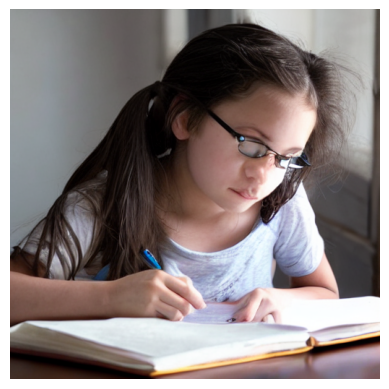

In [14]:
from matplotlib import pyplot as plt

image = pipe(prompt).images[0]

# Show with matplotlib
plt.imshow(image)
plt.axis("off")
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

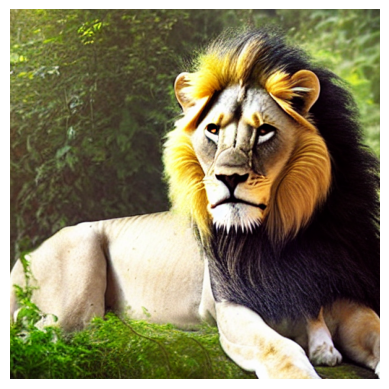

In [17]:
from diffusers import StableDiffusionPipeline
import torch
from matplotlib import pyplot as plt

# Load the model (only once)
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# Define prompt
prompt = "A majestic lion wearing a crown in a fantasy jungle"

# Generate image
image = pipe(prompt).images[0]

# Display image using matplotlib
plt.imshow(image)
plt.axis("off")
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

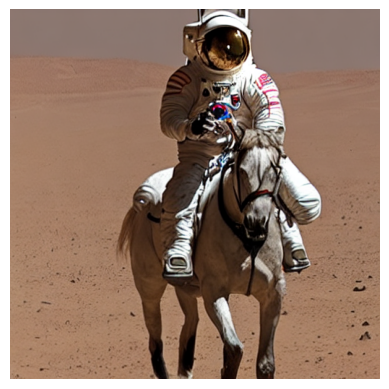

In [19]:
import transformers
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on Mars"
image = pipe(prompt).images[0]
from matplotlib import pyplot as plt

plt.imshow(image)
plt.axis("off")
plt.show()


image.save("astronaut_rides_horse.png")

In [23]:
en_fr_translator = pipeline("translation_en_to_fr")
response= en_fr_translator("Good Morning ")

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [21]:
print(response)

[{'translation_text': 'Bonjour'}]


In [24]:
from transformers import pipeline

# Load translation pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ur")

# Translate English to Urdu
sentence = "How are you? Hope you're doing well."
translated = translator(sentence, max_length=100)

# Print result
print("Urdu Translation:", translated[0]['translation_text'])


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/816k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/848k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Urdu Translation: تم کس طرح ہو؟ امید ہے کہ آپ کو اچھا کر رہے ہیں.
